In [183]:
#Importing Dependencies
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

Reading `crypto_data.csv` into Pandas. 
The dataset was obtained from [CryptoCompare](https://min-api.cryptocompare.com/data/all/coinlist).

In [184]:
coin_df = pd.read_csv("./crypto_data.csv")
coin_df

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1247,XBC,BitcoinPlus,Scrypt,True,PoS,1.283270e+05,1000000
1248,DVTC,DivotyCoin,Scrypt,False,PoW/PoS,2.149121e+07,100000000
1249,GIOT,Giotto Coin,Scrypt,False,PoW/PoS,NaN,233100000
1250,OPSC,OpenSourceCoin,SHA-256,False,PoW/PoS,NaN,21000000


Data Cleaning

In [185]:
# Replacing 'Unnamed:0' with 'Key'
coin_df.rename(columns={'Unnamed: 0':'Key'}, inplace=True)

In [186]:
# Discarding all cryptocurrencies not currently being traded
coin_trading_df = coin_df[coin_df.IsTrading == True].drop(columns = "IsTrading")
coin_trading_df.head()

,Key,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,PoW,NaN,611000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0


In [187]:
# Removing all rows that have at least one null value
coin_trading_df.dropna(inplace=True)
coin_trading_df.head()


,Key,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000


In [188]:
#Filtering for cryptocurrencies that have been mined. That is, the total coins > 0
filtered_coins = coin_trading_df.loc[coin_trading_df['TotalCoinsMined'] > 0]
filtered_coins

,Key,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethereum,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...,...
1238,ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [189]:
# Cleaning out Non-numerical data
filtered_coins.drop(['CoinName', 'Key'],  axis=1, inplace=True)
filtered_coins

C:\Users\Mariz Levinsohn\anaconda3\envs\PythonData\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
5,X13,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,PoW,1.792718e+07,21000000
8,Ethash,PoW,1.076842e+08,0
...,...,...,...,...
1238,SHA-256,DPoS,2.000000e+09,2000000000
1242,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,CryptoNight,PoW,9.802226e+08,1400222610
1246,Equihash,PoW,7.296538e+06,21000000


In [190]:
# Converting data types
filtered_coins = filtered_coins.astype({'TotalCoinSupply': 'float'})
filtered_coins

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,4.200000e+01
2,Scrypt,PoW/PoS,1.055185e+09,5.320000e+08
5,X13,PoW/PoS,2.927942e+10,3.141593e+11
7,SHA-256,PoW,1.792718e+07,2.100000e+07
8,Ethash,PoW,1.076842e+08,0.000000e+00
...,...,...,...,...
1238,SHA-256,DPoS,2.000000e+09,2.000000e+09
1242,Scrypt,PoW/PoS,1.493105e+07,2.500000e+08
1245,CryptoNight,PoW,9.802226e+08,1.400223e+09
1246,Equihash,PoW,7.296538e+06,2.100000e+07


Machine Learning Data Wrangling

In [191]:
# Create Dummy variables + count of columns in dataframe/dummies
X_dummies = pd.get_dummies(filtered_coins)

column_count = len(filtered_coins.columns)
dummy_count = len(X_dummies.columns)
print(f"Original column count: {column_count}, Dummy column count: {dummy_count}")

X_dummies.head()

Original column count: 4, Dummy column count: 98


,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,4.199995e+01,4.200000e+01,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1.055185e+09,5.320000e+08,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,2.927942e+10,3.141593e+11,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,1.792718e+07,2.100000e+07,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,0.000000e+00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [192]:
#Standardizing the scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_dummies)

In [193]:
#Reducing Dimensions in the dataset
pca = PCA(n_components=0.9, random_state = 42)
X_reduced = pca.fit_transform(X_scaled)
print(f"PCA reduction: was {dummy_count}, reduced to {X_reduced.shape[1]}")
column_reduced_count = X_reduced.shape[1]

PCA reduction: was 98, reduced to 74


TSNE shape (532, 2)
tSNE: was 74, now 2
The appearance of 2 clusters emerges


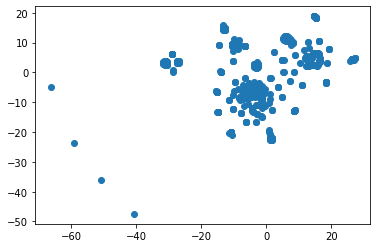

In [194]:
# Using tsne to vizualize the results on PCA transformation
tsne = TSNE(learning_rate=35, random_state = 42)
X_tsne = tsne.fit_transform(X_reduced)
print(f'TSNE shape {X_tsne.shape}')
print(f'tSNE: was {column_reduced_count}, now {X_tsne.shape[1]}')

#Ploting the Clusters
plt.scatter(X_tsne[:,0], X_tsne[:,1])
print(f'The appearance of 2 clusters emerges')

Data Analysis

C:\Users\Mariz Levinsohn\anaconda3\envs\PythonData\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Text(0, 0.5, 'Inertia')

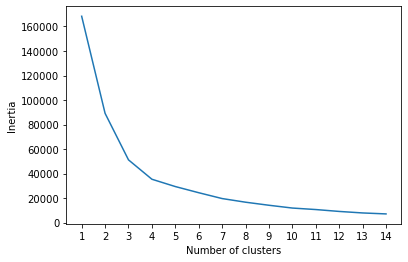

In [195]:
# Calculating the inertia for the range of k values
max_num = 15
inertia = []
k = list(range(1, max_num))

for i in k:
    km = KMeans(n_clusters = i, random_state = 42)
    km.fit(X_tsne)
    inertia.append(km.inertia_)


# Creating the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

# Plotting the elbow curve to find the best candidate for k
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,max_num))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

K-Means Model Analysis
It appears that closest number of clusters is  between 3 - 4 for this dataset. I would recommend running another PCA model to further reduce features for more distinct clusters. 

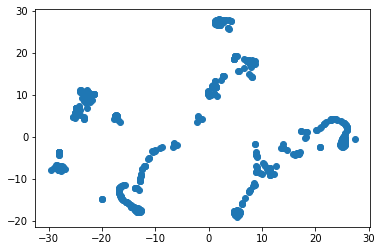

In [196]:
# Further reducing features
pca = PCA(n_components=4, random_state = 42)
X_reduced = pca.fit_transform(X_scaled)

# Visualization using TSNE
tsne = TSNE(learning_rate=35, random_state = 42)
X_tsne = tsne.fit_transform(X_reduced)

plt.scatter(X_tsne[:,0], X_tsne[:,1])

This visualization lends more evidence that there is indeed 4 distinct clusters defined in these cryptocurrencies. 